In [1]:
!pip install -q Control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 2.8 MB/s eta 0:00:00


# Importando Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control

In [3]:
# Define transfer function of the system
s = control.tf('s')

In [4]:
Kp = 35.00000
Tau = 258.00000
Delay = 67.00000

In [5]:
sys  = Kp/(Tau*s + 1)
sys

TransferFunction(array([35.]), array([258.,   1.]))

In [6]:
num, den = control.pade(Delay, n=2, numdeg=0)
Pade = control.tf(num, den)
Pade

TransferFunction(array([0.00044553]), array([1.00000000e+00, 2.98507463e-02, 4.45533526e-04]))

In [7]:
FOPDT = control.series(Pade, sys)
FOPDT

TransferFunction(array([0.01559367]), array([2.58000000e+02, 8.70149254e+00, 1.44798396e-01, 4.45533526e-04]))

In [8]:
# Definir os parâmetros do controlador PID
Kc = 0.08673
ti = 340.44773
td = 22.70906

# Define transfer function of the PID Controller
Controller = Kc*(1 + (1/(ti*s)) + (td*s))

In [9]:
# Criar a malha fechada do sistema com o controlador PID
closed_loop_system = control.feedback(Controller * FOPDT, 1)

In [10]:
# Definir o vetor de tempo para a simulação
t = np.linspace(0, 3000, 1000)

In [11]:
# Definir os tempos e amplitudes dos degraus
step_times = [0, 500, 1000, 2000]  # Momentos em que os degraus ocorrem
step_amplitudes = [1, 1, 2, -1]  # Amplitudes dos degraus

In [12]:
# Inicializar a entrada com zeros
u = np.zeros_like(t)

In [13]:
# Adicionar os degraus na entrada (Alterações de Setpoint)
for step_time, step_amplitude in zip(step_times, step_amplitudes):
    u[t >= step_time] += step_amplitude

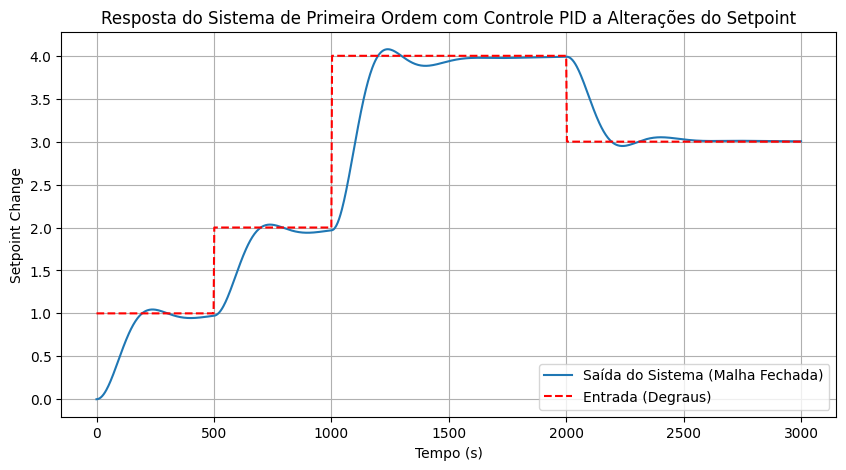

In [14]:
# Simular a resposta do sistema em malha fechada
t, y = control.forced_response(closed_loop_system, t, u)

# Plotar a resposta do sistema
plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Saída do Sistema (Malha Fechada)')
plt.plot(t, u, 'r--', label='Entrada (Degraus)')
plt.xlabel('Tempo (s)')
plt.ylabel('Setpoint Change')
plt.title('Resposta do Sistema de Primeira Ordem com Controle PID a Alterações do Setpoint')
plt.legend()
plt.grid(True)
plt.show()
